<a href="https://colab.research.google.com/github/adarshmodh/Deep-Learning-Assignments/blob/master/PEGASOS_ADAGRAD_SVM_FMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1 DATASET CLEANING 

In [36]:
# Creating dataset

from pathlib import Path
import random
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

np.random.seed(1)

path = Path("/content/gdrive/My Drive/ESE545_2020/Project_2")

train_images_data = np.load(path /'train.npy')
train_labels_data = np.load(path /'train_labels.npy')
test_images_data = np.load(path /'test.npy')
test_labels_data = np.load(path /'test_labels.npy')
print(len(train_labels_data), len(test_labels_data))


def preprocessing(images, labels, valid_labels):
  processed_images= []
  processed_labels= []
  
  for ind,label in enumerate(labels):
    if label in valid_labels:
      
      if len(valid_labels) == 2:
        processed_labels.append(1 if label == valid_labels[0] else -1)
      else:
        processed_labels.append(label)
      
      processed_images.append(images[ind])

  return np.array(processed_images), np.array(processed_labels)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
60000 10000


(12000,) (2000,)
(12000, 28, 28)


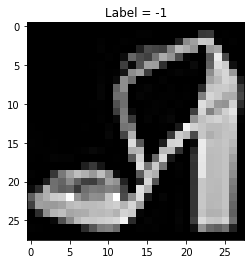

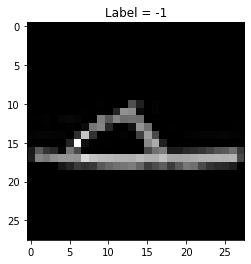

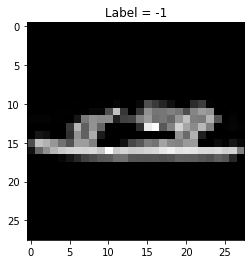

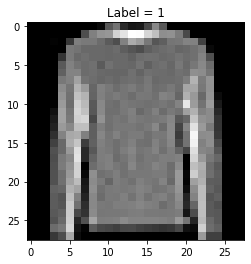

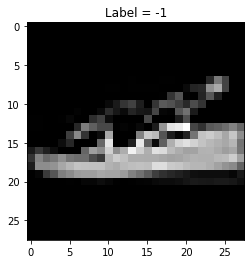

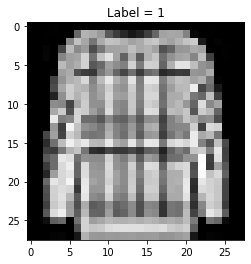

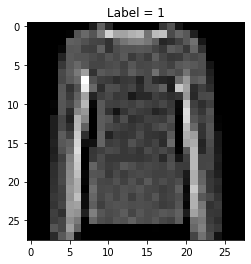

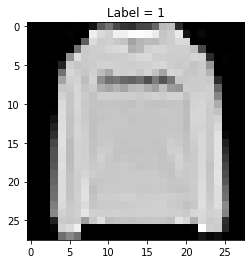

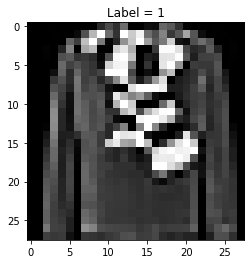

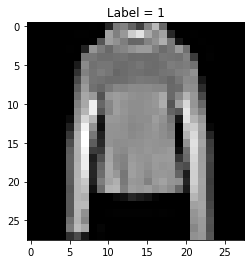

In [42]:
# showing random samples 

import random

valid_labels = [2,5]
train_images, train_labels = preprocessing(train_images_data,train_labels_data, valid_labels)
test_images, test_labels = preprocessing(test_images_data, test_labels_data, valid_labels)

print(train_labels.shape, test_labels.shape)
print(train_images.shape)

for i in range(10):
  index = random.randint(0,len(test_images))
  image, label = test_images[index], test_labels[index]
  # print(image.shape, label)
  plt.imshow(image, cmap='gray')
  plt.title('Label = {}' .format(label))
  # plt.title('Label = {}' .format(label))
  plt.pause(0.001)

# Q2 Pegasos

In [0]:
# def Pegasos(x_train,y_train,x_test,y_test, T,lmbda,k):
    
#   m, n1,n2 = x_train.shape  
#   w = np.zeros(n1*n2) 
#   train_error=[]
#   test_error=[]

#   for t in range(1,T+1):
    
#     index = np.random.choice(m, k, replace=False)
#     img, label = x_train[index]/255, y_train[index]
#     img = img.reshape(label.shape[0], 784)
#     eta=1.0/(lmbda*t)
    
#     for i in range(len(label)):
#       x, y = img[i], label[i]
#       yxw = np.dot(y, x@w)
#       delta = -np.dot(x, y)
      
#       if yxw >= 1: continue
#       w = w - eta*(lmbda*w + delta)
#       w = w * min(1, 1/(np.sqrt(lmbda)*np.linalg.norm(w)))

#     y_pred = np.sign(x_train.reshape(x_train.shape[0],n1*n2)@w)
#     hit=np.where(y_train==y_pred)[0]
#     train_error.append(1-len(hit)/y_train.shape[0])

#     test_y_pred = np.sign(x_test.reshape(x_test.shape[0],n1*n2)@w)
#     test_hit = np.where(y_test==test_y_pred)[0]
#     test_error.append(1-len(test_hit)/y_test.shape[0])

#   return w,train_error,test_error

def Pegasos(x_train,y_train,x_test,y_test, T,lambda1,k):
    
    m, n1,n2 = x_train.shape  
    w = np.zeros(n1*n2) 
    train_error=[]
    test_error=[]

    for t in range(1,T+1):
        I=np.random.choice(m, k, replace=False)
        A_plus = np.where(np.multiply(x_train[I].reshape(k,n1*n2) @ w, y_train[I]) < 1)
        eta=1.0/(lambda1*t)
        
        w = (1 - eta * lambda1) * w + (eta / k) * x_train[np.array(I)[A_plus[0].tolist()]].reshape(A_plus[0].shape[0],n1*n2).T @ y_train[np.array(I)[A_plus[0].tolist()]]
        w = min(1.0, 1.0 / np.sqrt(lambda1 * np.square(w).sum())) * w
        
        y_pred = np.sign(x_train.reshape(m,n1*n2)@w)
        hit=np.where(y_train==y_pred)[0]
        train_error.append(1-len(hit)/y_train.shape[0])

        test_y_pred = np.sign(x_test.reshape(x_test.shape[0],n1*n2)@w)
        test_hit = np.where(y_test==test_y_pred)[0]
        test_error.append(1-len(test_hit)/y_test.shape[0])

    return w,train_error,test_error       

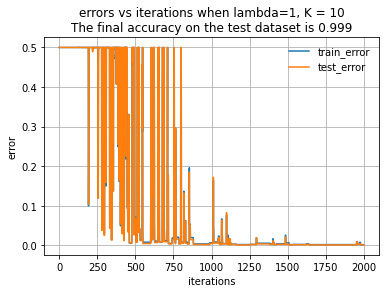

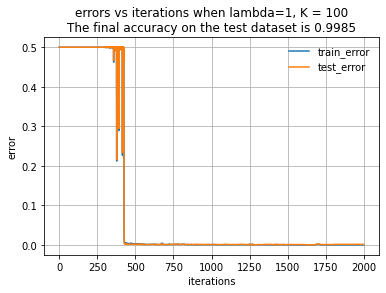

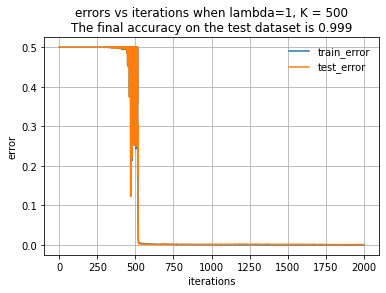

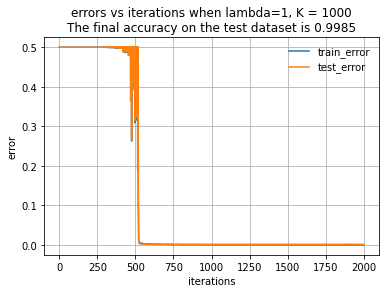

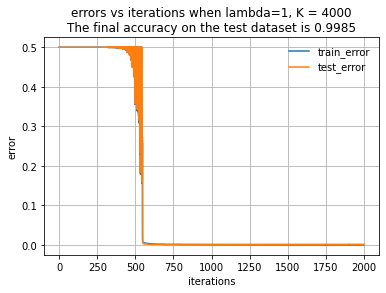

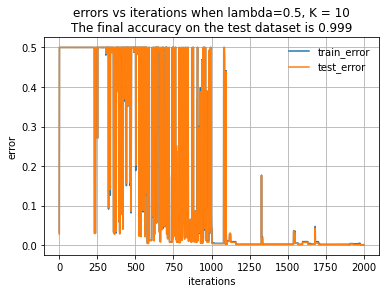

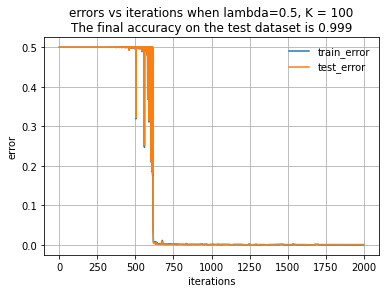

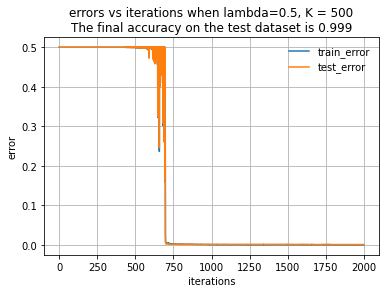

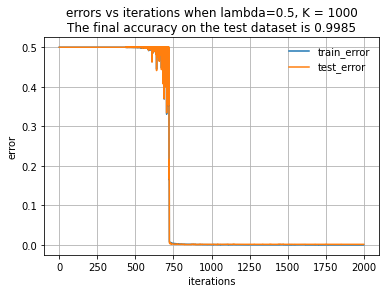

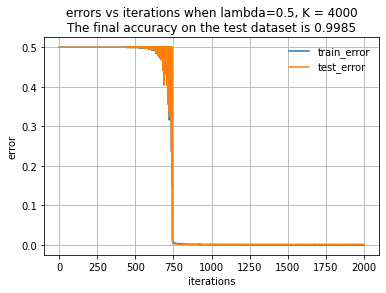

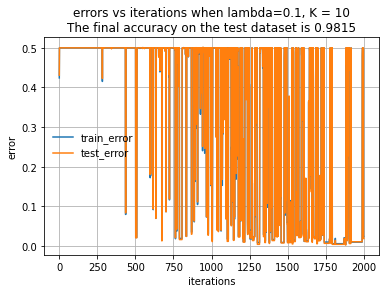

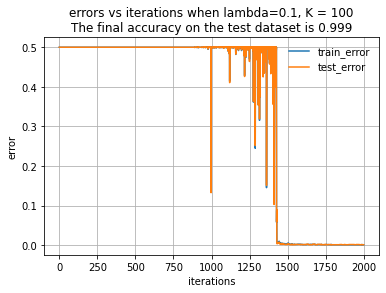

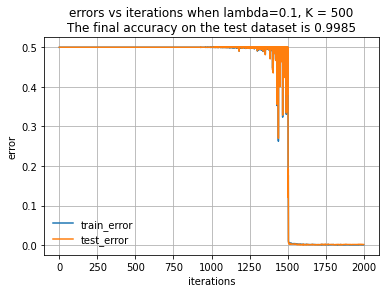

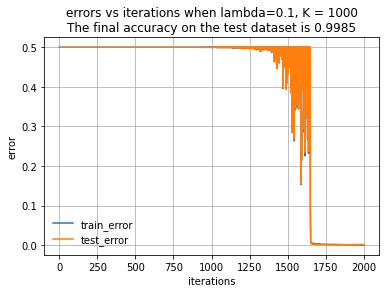

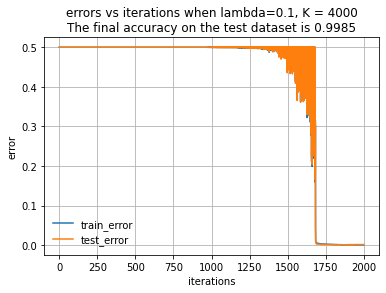

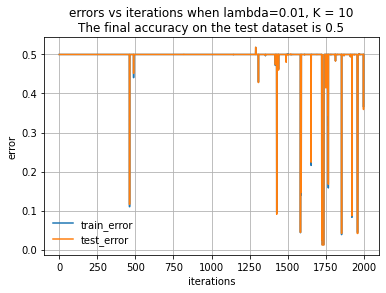

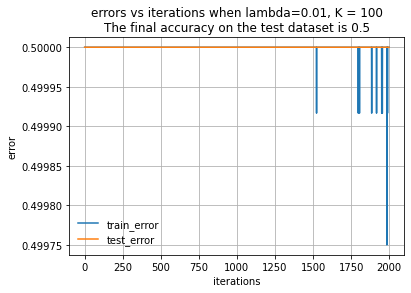

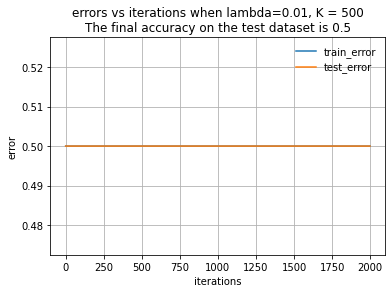

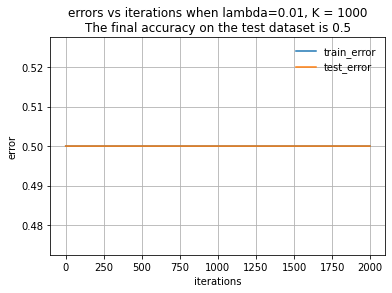

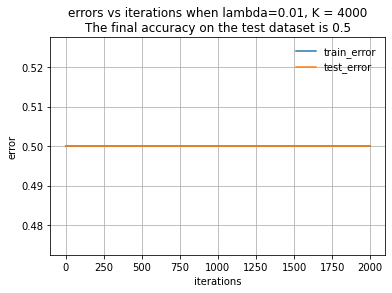

In [10]:
# parameter search

iters = 2000
for lmbda in [1, 0.5, 0.1, 0.01]:
  for k in [10,100,500,1000,4000]:
    w, train_error, test_error = Pegasos(train_images,train_labels,test_images, test_labels, iters,lmbda,k)
    plt.plot(train_error,label='train_error')
    plt.plot(test_error,label='test_error')
    plt.title('errors vs iterations when lambda={}, K = {}'.format(lmbda,k) + '\n' + 'The final accuracy on the test dataset is {}'.format(1-test_error[-1]))
    plt.xlabel('iterations')
    plt.ylabel('error')
    plt.legend(frameon=False)
    plt.grid()
    plt.show()
    plt.pause(0.01)

# Final selected parameters for Pegasos

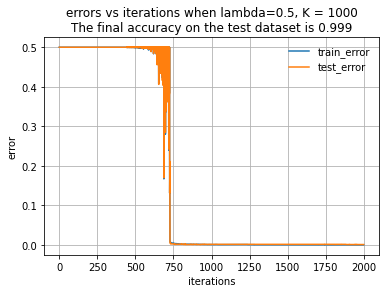

In [16]:
k = 1000
lmbda = 0.5
iters = 2000
w, train_error, test_error = Pegasos(train_images,train_labels,test_images, test_labels, iters,lmbda,k)
plt.plot(train_error,label='train_error')
plt.plot(test_error,label='test_error')
plt.title('errors vs iterations when lambda={}, K = {}'.format(lmbda,k) + '\n' + 'The final accuracy on the test dataset is {}'.format(1-test_error[-1]))
plt.xlabel('iterations')
plt.ylabel('error')
plt.legend(frameon=False)
plt.grid()
plt.show()

# Q3 Adagrad 

In [0]:
def Adagrad(x_train,y_train,x_test,y_test, T,lambda1,k):
    eps = 1e-6
    m, n1,n2 = x_train.shape  
    w = np.zeros(n1*n2) 
    gti = np.zeros(n1*n2) + eps  
    train_error=[]
    test_error=[]

    for t in range(1,T+1):
        I = np.random.choice(m, k, replace=False)
        A_plus = np.where(np.multiply(x_train[I].reshape(k,n1*n2) @ w, y_train[I]) < 1)
        eta=1.0/(lambda1*t)
        
        grad=-(1/k)*x_train[np.array(I)[A_plus[0].tolist()]].reshape(A_plus[0].shape[0],n1*n2).T @ y_train[np.array(I)[A_plus[0].tolist()]]
        gti+=np.square(grad)
        w = w - eta*grad / np.sqrt(gti)
        w=min(1.0, 1.0 / np.sqrt(lambda1 * (gti*np.square(w)).sum())) * w
        
        y_pred = np.sign(x_train.reshape(m,n1*n2)@w)
        hit=np.where(y_train==y_pred)[0]
        train_error.append(1-len(hit)/y_train.shape[0])

        test_y_pred = np.sign(x_test.reshape(x_test.shape[0],n1*n2)@w)
        test_hit = np.where(y_test==test_y_pred)[0]
        test_error.append(1-len(test_hit)/y_test.shape[0])

    return w,train_error,test_error

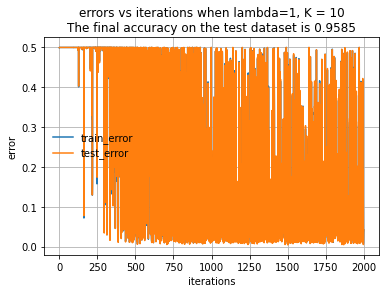

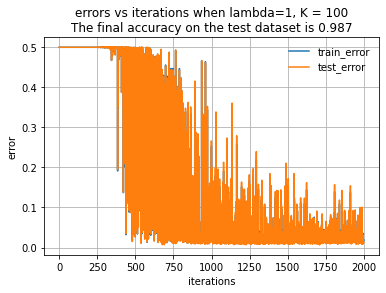

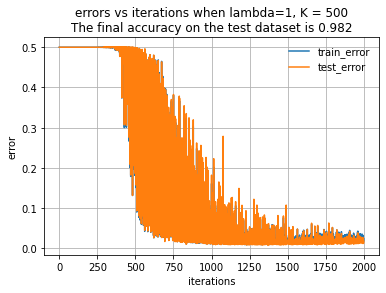

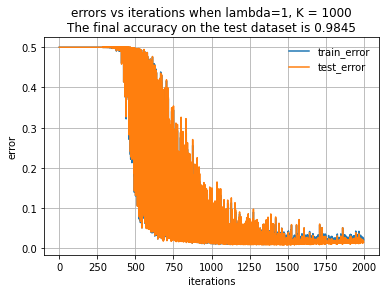

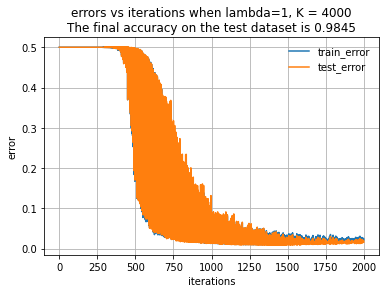

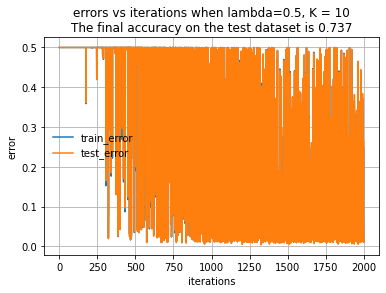

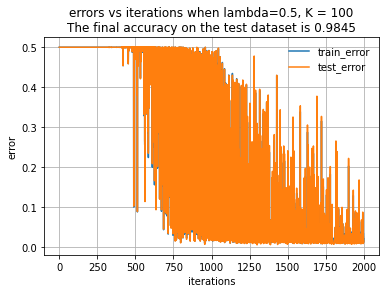

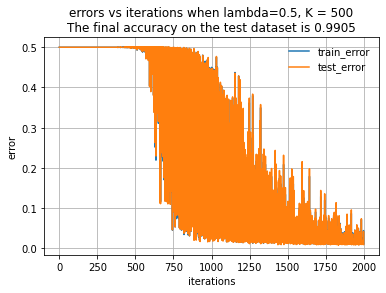

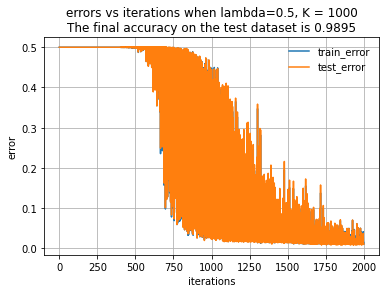

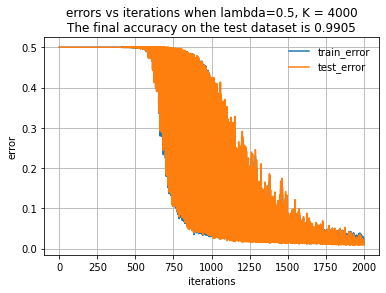

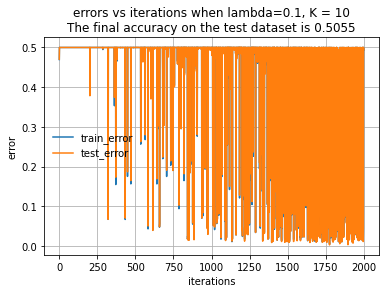

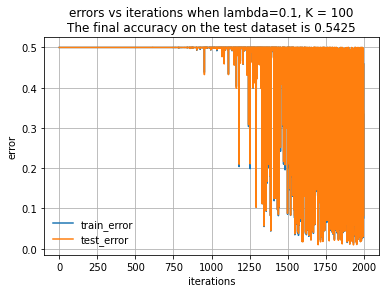

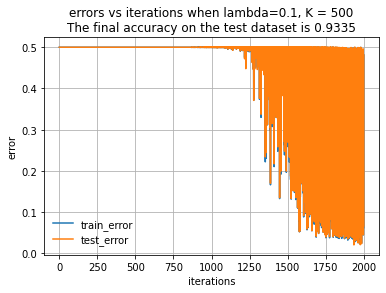

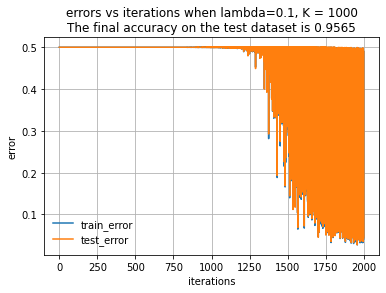

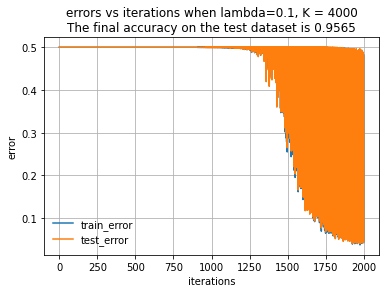

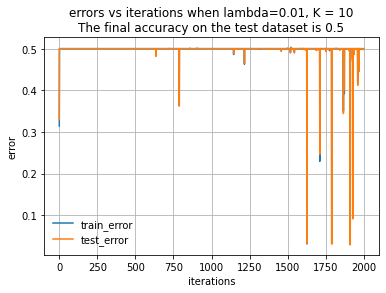

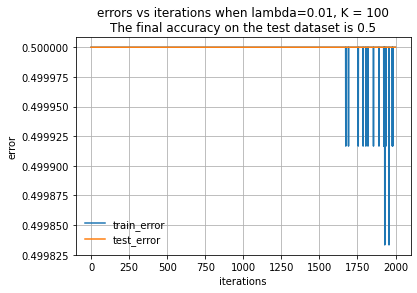

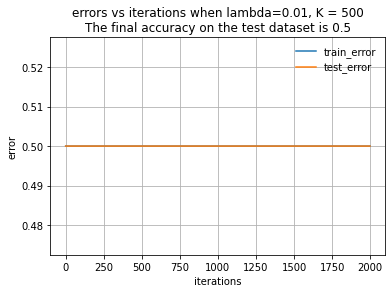

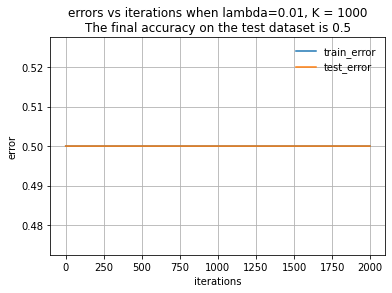

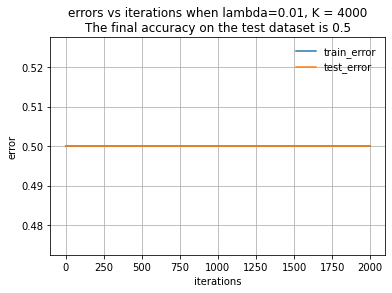

In [6]:
# parameter search

iters = 2000
for lmbda in [1, 0.5, 0.1, 0.01]:
  for k in [10,100,500,1000,4000]:
    w, train_error, test_error = Adagrad(train_images,train_labels,test_images, test_labels, iters,lmbda,k)
    plt.plot(train_error,label='train_error')
    plt.plot(test_error,label='test_error')
    plt.title('errors vs iterations when lambda={}, K = {}'.format(lmbda,k) + '\n' + 'The final accuracy on the test dataset is {}'.format(1-test_error[-1]))
    plt.xlabel('iterations')
    plt.ylabel('error')
    plt.legend(frameon=False)
    plt.grid()
    plt.show()
    plt.pause(0.01)

# Final selected parameters for Adagrad

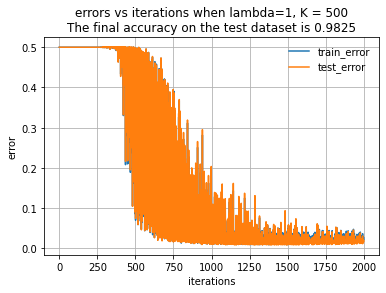

In [19]:
k = 500
lmbda = 1
iters = 2000
w, train_error, test_error = Adagrad(train_images,train_labels,test_images, test_labels, iters,lmbda,k)

plt.plot(train_error,label='train_error')
plt.plot(test_error,label='test_error')
plt.title('errors vs iterations when lambda={}, K = {}'.format(lmbda,k) + '\n' + 'The final accuracy on the test dataset is {}'.format(1-test_error[-1]))
plt.xlabel('iterations')
plt.ylabel('error')
plt.legend(frameon=False)
plt.grid()
plt.show()


# Q5 Multi-class classification SVM-Pegasos

In [0]:
# train 3 binary classifiers

def Pegasos_1(x_train,y_train, T,lambda1,k):
    m, n1,n2 = x_train.shape  
    w = np.zeros(n1*n2)
    w_all =  np.zeros((T, n1*n2))

    for t in range(T):
        I=np.random.choice(m, k, replace=False)
        A_plus = np.where(np.multiply(x_train[I].reshape(k,n1*n2) @ w, y_train[I]) < 1)
        eta=1.0/(lambda1*(t+1))
        
        w = (1 - eta * lambda1) * w + (eta / k) * x_train[np.array(I)[A_plus[0].tolist()]].reshape(A_plus[0].shape[0],n1*n2).T @ y_train[np.array(I)[A_plus[0].tolist()]]
        w = min(1.0, 1.0 / np.sqrt(lambda1 * np.square(w).sum())) * w
        w_all[t] = w
    return w_all    

#####################################################
valid_labels = [2,5]
train_images, train_labels = preprocessing(train_images_data,train_labels_data, valid_labels)

k = 1000
lmbda = 0.5
iters = 2000
w1 = Pegasos_1(train_images,train_labels, iters,lmbda,k)


########################################################
valid_labels = [2,7]
train_images, train_labels = preprocessing(train_images_data,train_labels_data, valid_labels)

k = 1000
lmbda = 0.5
iters = 2000
w2 = Pegasos_1(train_images,train_labels, iters,lmbda,k)


##########################################################
valid_labels = [5,7]
train_images, train_labels = preprocessing(train_images_data,train_labels_data, valid_labels)

k = 1000
lmbda = 0.5
iters = 2000
w3 = Pegasos_1(train_images,train_labels, iters,lmbda,k)


def find_number(n):
    pred = np.sign(n)
    nums = [2,5,7]
    if pred[0]==1 and pred[1]==1:
        return 2

    if pred[0]==-1 and pred[2]==1:
        return 5
    
    if pred[1]==-1 and pred[2]==-1:
        return 7
    
    n2 = n[0]+ n[1]
    n5 = -n[0]+n[2]
    n7 = -n[1]-n[2]

    pred_num = nums[np.argmax([n2,n5,n7])]
    return pred_num

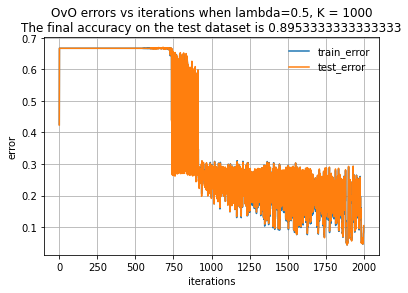

In [53]:
# generate training/ testing curves for Multi-class classification
# Plotting the OvO error 

valid_labels = [2,5,7]
test_images, test_labels = preprocessing(test_images_data, test_labels_data, valid_labels)
train_images, train_labels = preprocessing(train_images_data, train_labels_data, valid_labels)


def calculate_error(x, y, w1,w2,w3): 
  m = x.shape[0]
  
  y_pred_1 = x.reshape(m,784)@w1
  y_pred_2 = x.reshape(m,784)@w2
  y_pred_3 = x.reshape(m,784)@w3

  y_pred = []
  for i in range(m):
    y_pred.append(find_number([y_pred_1[i],y_pred_2[i],y_pred_3[i]]))

  y_pred = np.array(y_pred)
  hit = np.where(y==y_pred)[0]
  error = 1-len(hit)/y.shape[0]
  return error

train_error = []
test_error = []

for i in range(w1.shape[0]):
  train_error.append(calculate_error(train_images, train_labels, w1[i],w2[i],w3[i]))
  test_error.append(calculate_error(test_images, test_labels, w1[i],w2[i],w3[i]))
  
plt.plot(train_error,label='train_error')
plt.plot(test_error,label='test_error')
plt.title('OvO errors vs iterations when lambda={}, K = {}'.format(lmbda,k) + '\n' + 'The final accuracy on the test dataset is {}'.format(1-test_error[-1]))
plt.xlabel('iterations')
plt.ylabel('error')
plt.legend(frameon=False)
plt.grid()
plt.show()

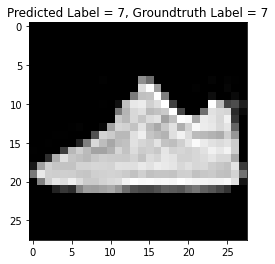

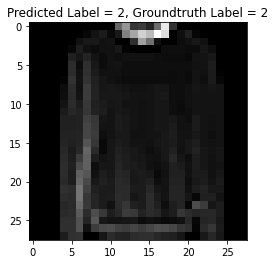

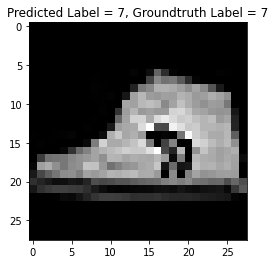

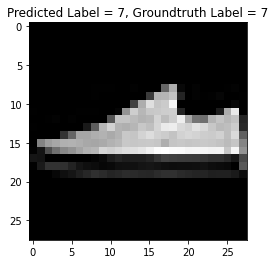

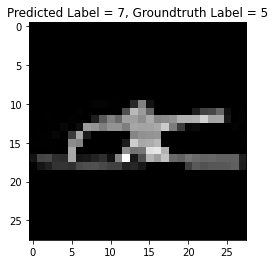

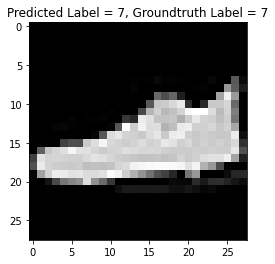

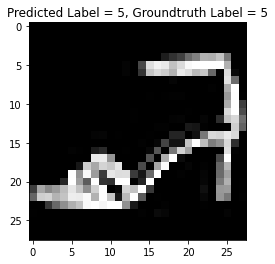

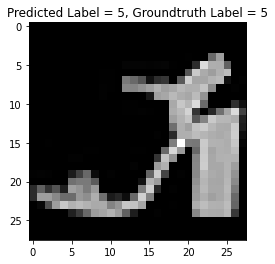

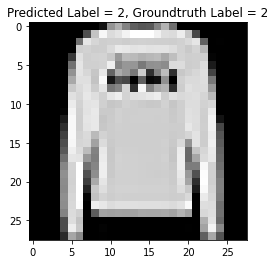

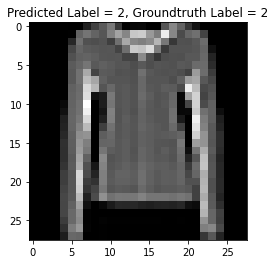

In [47]:
############## Show test samples of Mult-class classifier

###### Tie breaker using OvO during testing of Multi-class classification 

valid_labels = [2,5,7]
test_images, test_labels = preprocessing(test_images_data, test_labels_data, valid_labels)

w1_final, w2_final, w3_final = w1[-1],w2[-1],w3[-1]

for i in range(10):
  index = random.randint(0,len(test_labels))
  x_test, y_test = test_images[index], test_labels[index]

  y_pred_1 = x_test.reshape(1,784)@w1_final
  y_pred_2 = x_test.reshape(1,784)@w2_final
  y_pred_3 = x_test.reshape(1,784)@w3_final

  y_pred = find_number([y_pred_1,y_pred_2,y_pred_3])
  
  plt.imshow(x_test, cmap='gray')
  plt.title('Predicted Label = {}, Groundtruth Label = {}' .format(y_pred, y_test))
  plt.pause(0.01)
